In [1]:
# Data Processing
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import torch

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# save model to file
import pickle

In [2]:
data = pd.read_csv("/media/csuser/DATA/ARTEMIS/romania/rom_triage_smote.csv", sep=",")

In [5]:
# Split the data into features (X) and target (y)
X = data.drop(['esi'], axis=1)
y = data['esi']

print(y.head())

# Split the data into training and test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

print(type(X_tr))

X_train = torch.tensor(X_tr.values, dtype=torch.float64)
y_train = torch.tensor(y_tr.values.reshape(-1,1), dtype=torch.long)
X_test = torch.tensor(X_te.values, dtype=torch.float64)
y_test = torch.tensor(y_te.values.reshape(-1,1), dtype=torch.long)

print(y_test.shape)

# convert to one hot vector
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y_train)
print(ohe.categories_)

y_train = torch.from_numpy(ohe.transform(y_train))
y_test = torch.from_numpy(ohe.transform(y_test))
y_test.shape

0    4.0
1    2.0
2    3.0
3    3.0
4    4.0
Name: esi, dtype: float64
<class 'pandas.core.frame.DataFrame'>
torch.Size([117852, 1])
[array([1, 2, 3, 4, 5])]


torch.Size([117852, 5])

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train.numpy(), y_train.numpy())

y_pred = rf.predict(X_test.numpy())

In [ ]:
from numpy import argmax

print(y_test.shape)
print(y_pred.shape)
y_test = argmax(a=y_test, axis=1)
y_pred = argmax(a=y_pred, axis=1)
print(y_test)
print(y_pred)

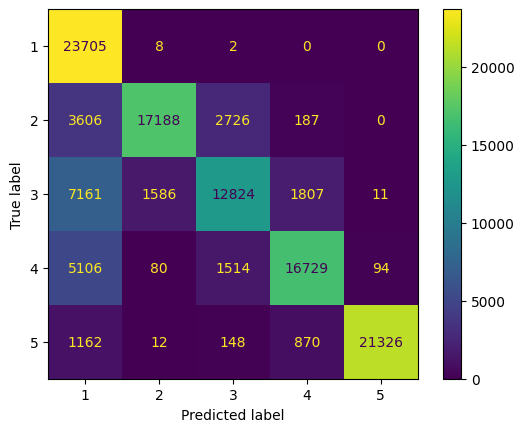

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test+1, y_pred+1)
plt.savefig('/media/csuser/DATA/ARTEMIS/romania/figs/RF_confusion_romania_smote.png', dpi=300)

In [9]:
cm = confusion_matrix(y_test, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(TPR, TNR, PPV, NPV, FPR, FDR, ACC)

[0.99957833 0.72501793 0.54829193 0.7111763  0.9067948 ] [0.81904033 0.98209145 0.95352678 0.96963818 0.99888693] [0.58186058 0.91067076 0.74497502 0.85382535 0.99510056] [0.99987032 0.93413688 0.89501977 0.93085621 0.97726636] [0.18095967 0.01790855 0.04647322 0.03036182 0.00111307] [0.41813942 0.08932924 0.25502498 0.14617465 0.00489944] [0.85536945 0.93037878 0.87310355 0.91804976 0.98050945]


In [10]:
acc = accuracy_score(y_test, y_pred)
print('Acc: ', acc)

prec = precision_score(y_test, y_pred, average='weighted')
print('Prec: ', prec)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)

Acc:  0.7787054950276618
Prec:  0.8171233806683407
Recall:  0.7787054950276618


In [ ]:
!pwd

/media/csuser/DATA/ARTEMIS/romania


In [16]:
with open('/media/csuser/DATA/ARTEMIS/models/RF_romania_smote.pickle', 'wb') as f:
    pickle.dump(rf, f)